## 💾 Load data

I've built a bot that harvested every tweet containing the hashtags `#surf`, `#kitesurf` and `#windsurf` for a couple of days. Those tweets all have a location with geographic coordinates. You can read more about this side project [here](https://www.data-to-viz.com/story/GPSCoordWithoutValue.html).

The dataset is stored on [github](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/TweetSurfData.csv). Let's load it using `pandas`. Note that I've already aggregated the dataset per location. So for each location, I have a `n` column that tells the number of tweets.

In [21]:
# Libraries
import pandas as pd

# read the data (on the web)
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/TweetSurfData.csv', sep=";")

# Check the first 2 rows
data.head(2)


homelon  homelat homecontinent   n
0  -178.12   -14.29     Australia  10
1  -172.10   -13.76           NaN   2

## 📍 Background map

As explained in the [background map section](https://python-graph-gallery.com/281-basic-map-with-basemap) of the gallery, there are several way to build a background map with Python. Here I suggest to use the `basemap` library that provides boundaries for every country:

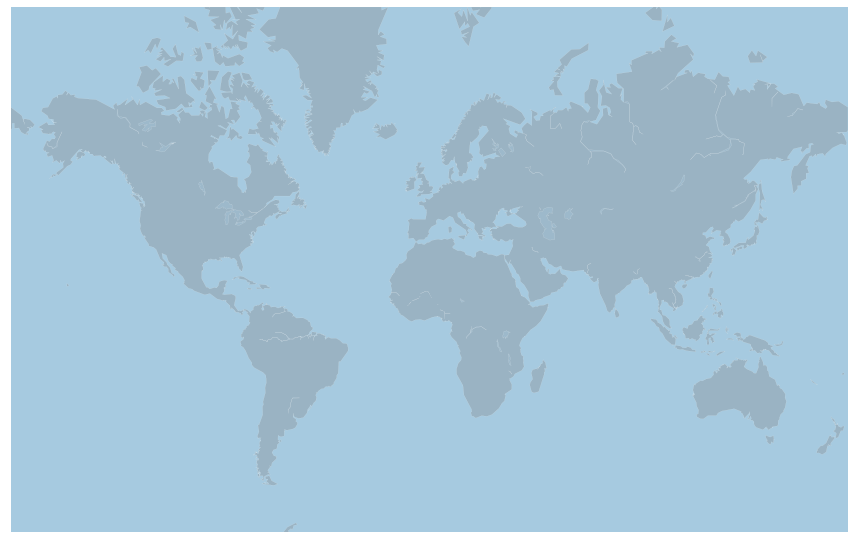

In [45]:
# Basemap library
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
 
# Set the dimension of the figure
plt.rcParams["figure.figsize"]=15,10;

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80, projection='merc');
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");




## ⭕ Bubble map

Let's add each data point on the map thanks to the `scatter()` function. The scatter() function is described extensively in the [scatterplot section](https://python-graph-gallery.com/scatter-plot) of the gallery. `x` and `y` coordinates are longitude and latitude respectively. `s` is the size of each circle, it is mapped to the `n` color of the data frame.

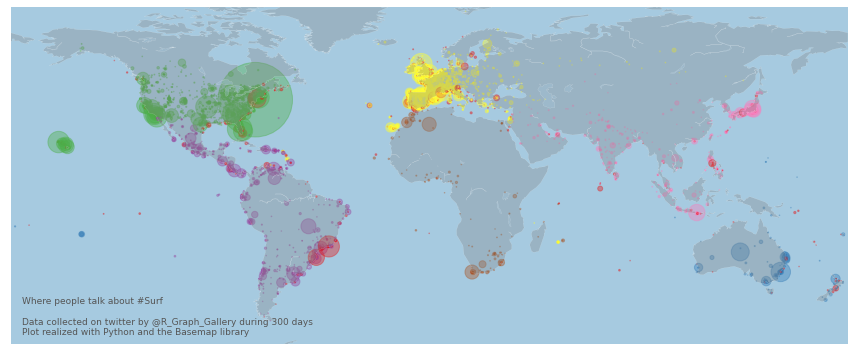

In [44]:
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(
    x=data['homelon'], 
    y=data['homelat'], 
    s=data['n']/6, 
    alpha=0.4, 
    c=data['labels_enc'], 
    cmap="Set1"
)
 
# copyright and source data info
plt.text( -175, -62,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' );
 


> Note: I can't use the `mercator` projection here. When I do, the circles coordinates are not recognized properly anymore. Please let me know if you have a fix!